# PCA Mini-Project Notebook
This notebook implements PCA on a toy dataset step by step.

In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## 1. Generate a Toy Dataset
Create a synthetic dataset of 100 samples in three dimensions.

In [2]:
np.random.seed(0)
X1 = np.random.rand(100)
X2 = 2 * X1 + 0.1 * np.random.randn(100)
X3 = np.random.rand(100)
X = np.vstack((X1, X2, X3)).T  # shape (100, 3)
X[:5]

array([[0.5488135 , 0.98111202, 0.20747008],
       [0.71518937, 1.52046138, 0.42468547],
       [0.60276338, 1.252093  , 0.37416998],
       [0.54488318, 0.936142  , 0.46357542],
       [0.4236548 , 0.99613482, 0.27762871]])

## 2. Standardize the Data

In [3]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std[:5]

array([[ 0.26368103,  0.02792627, -0.90003632],
       [ 0.84077065,  0.95249196, -0.17923133],
       [ 0.45081101,  0.4924484 , -0.34686133],
       [ 0.25004836, -0.04916243, -0.05017936],
       [-0.17044317,  0.05367871, -0.66722275]])

## 3. Compute Covariance Matrix & Eigendecomposition

In [4]:
cov_mat = np.cov(X_std, rowvar=False)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_vals, eig_vecs

(array([2.02387361, 0.0140562 , 0.99237322]),
 array([[-0.69942586, -0.70545701, -0.1146031 ],
        [-0.70204423,  0.70819393, -0.07480142],
        [-0.13393041, -0.0281384 ,  0.99059118]]))

## 4. Sort & Select Principal Components

In [8]:
idx = np.argsort(eig_vals)[::-1]
W = eig_vecs[:, idx[:2]]  # shape (3,2)
X_pca = X_std @ W
# Multiply first component by -1 to match the original direction
X_pca[:, 0] *= -1
X_pca[:5]

array([[ 0.08348858, -0.92387562],
       [ 1.2327437 , -0.34514765],
       [ 0.61457416, -0.43209795],
       [ 0.13365555, -0.07468613],
       [-0.17088895, -0.64542689]])

## 5. Compare with scikit-learn PCA

In [9]:
pca = PCA(n_components=2)
X_skpca = pca.fit_transform(X_std)
X_skpca[:5]

array([[ 0.08348858, -0.92387562],
       [ 1.2327437 , -0.34514765],
       [ 0.61457416, -0.43209795],
       [ 0.13365555, -0.07468613],
       [-0.17088895, -0.64542689]])

## 6. Visualization

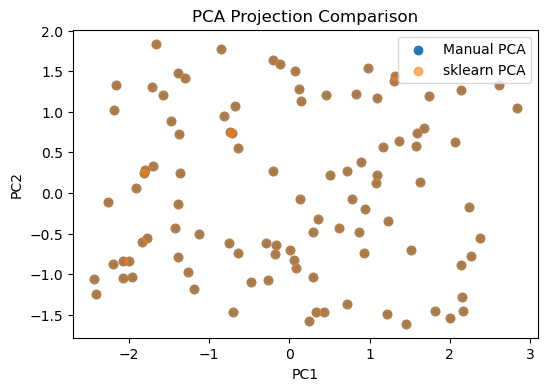

In [10]:
plt.figure(figsize=(6,4))
plt.scatter(X_pca[:,0], X_pca[:,1], label="Manual PCA")
plt.scatter(X_skpca[:,0], X_skpca[:,1], alpha=0.6, label="sklearn PCA")
plt.legend()
plt.title("PCA Projection Comparison")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

## 7. Exercises
1. Plot explained variance ratio
2. Reconstruct original data and compute MSE
3. Add noise to features and repeat PCA
4. Apply PCA to Iris dataset